In [1]:
from math import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tqdm import tqdm

# Parameters

In [2]:
t1 =0.020   # time constant
t2 =0.010
t3 =0.010                      
tc= (0.010 + 0.010 + 0.020)/3  #mean of all value to test with TAUx=TAU for all x
Delta = 0.0070 + 0.0010 + 0.0008 # delay

# equation resolution: Plot G=f(w) , TAUx=TAU for all x

 53%|█████▎    | 7979976/14999999 [00:42<00:37, 188254.91it/s]

w: 79.44371 Gt: 3.0911556679
w: 79.44372 Gt: 3.09115700371
w: 79.44373 Gt: 3.09115833952
w: 79.44374 Gt: 3.09115967534
w: 79.44375 Gt: 3.09116101115
w: 79.44376 Gt: 3.09116234696


100%|██████████| 14999999/14999999 [01:19<00:00, 187916.03it/s]


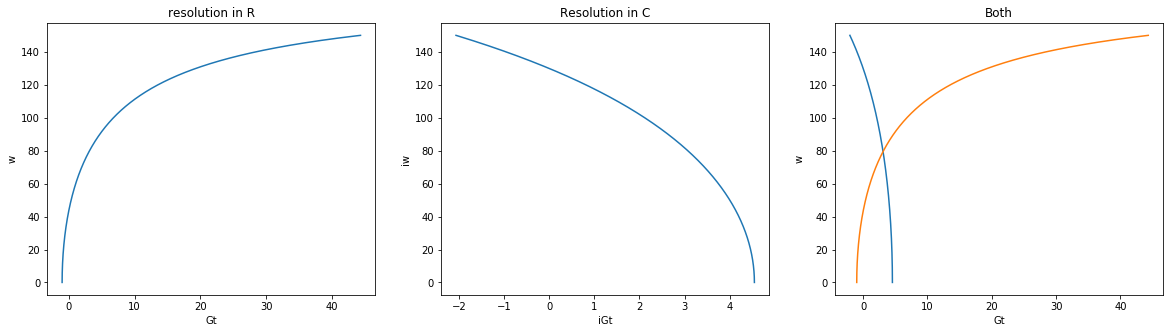

In [3]:
wlist= list() 
Gtlist= list() 
iwlist= list() 
iGtlist = list()

for w in tqdm(np.arange(0.00001, 150, 0.00001)):
    Gt= (3*(w*tc)**2 - 1)/cos(w*Delta)
    Gtlist.append(Gt)
    wlist.append(w)
    
    iGt = (-(w*tc)**3 + 3*w*tc)/sin(w*Delta)
    iGtlist.append(iGt)
    iwlist.append(w)
    
    if round(Gt,5) == round(iGt,5):
        print('w:',w,'Gt:',Gt)
    else:
        pass
            
fig, axes = plt.subplots(1, 3,figsize=(20, 5))

axes[0].plot(Gtlist, wlist)
axes[0].set_title("resolution in R")
axes[0].set_ylabel('w')
axes[0].set_xlabel('Gt')

axes[1].plot(iGtlist, iwlist)
axes[1].set_title("Resolution in C")           
axes[1].set_ylabel('iw')
axes[1].set_xlabel('iGt')

axes[2].plot(iGtlist, iwlist)
axes[2].plot(Gtlist, wlist)
axes[2].set_ylabel('w')
axes[2].set_xlabel('Gt')
axes[2].set_title("Both");

plt.show()

# equation resolution: Plot G=f(w) , TAUx=TAUx for all x

 58%|█████▊    | 8648512/14999999 [00:46<00:34, 183575.66it/s]

w: 86.14884 Gt: 3.73319582344
w: 86.14885 Gt: 3.73319732091
w: 86.14886 Gt: 3.73319881837
w: 86.14887 Gt: 3.73320031583
w: 86.14888 Gt: 3.7332018133
w: 86.14889 Gt: 3.73320331076
w: 86.1489 Gt: 3.73320480823


100%|██████████| 14999999/14999999 [01:21<00:00, 184333.55it/s]


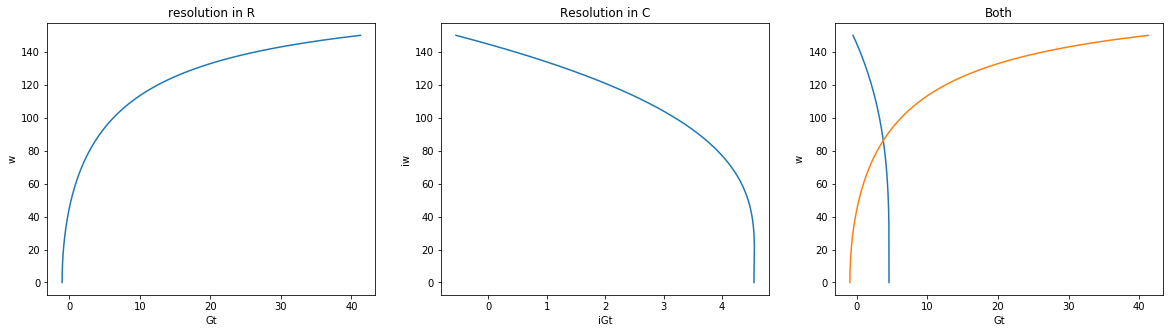

In [4]:
w1list= list() 
G1tlist= list() 
iw1list= list() 
iG1tlist = list()

for w in tqdm(np.arange(0.00001, 150, 0.00001)):
    Gt= ((w**2)*(t1*t2+t2*t3+t1*t3) - 1)/cos(w*Delta)
    G1tlist.append(Gt)
    w1list.append(w)
    
    iGt = (-w**3 * t1*t2*t3) + w*(t1+t2+t3)/sin(w*Delta)
    iG1tlist.append(iGt)
    iw1list.append(w)
    
    if round(Gt,5) == round(iGt,5):
        print('w:',w,'Gt:',Gt)
    else:
        pass
            
fig, axes = plt.subplots(1, 3,figsize=(20, 5))

axes[0].plot(G1tlist, w1list)
axes[0].set_title("resolution in R")
axes[0].set_ylabel('w')
axes[0].set_xlabel('Gt')

axes[1].plot(iG1tlist, iw1list)
axes[1].set_title("Resolution in C")           
axes[1].set_ylabel('iw')
axes[1].set_xlabel('iGt')

axes[2].plot(iG1tlist, iw1list)
axes[2].plot(G1tlist, w1list)
axes[2].set_ylabel('w')
axes[2].set_xlabel('Gt')
axes[2].set_title("Both");

plt.show()

# Delta variation

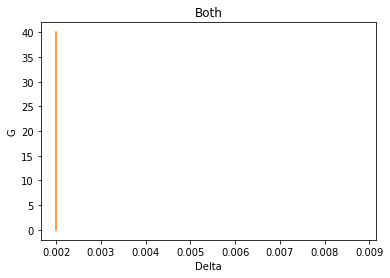

In [5]:
w = 86.14887 

Dlist=list()
GtDlist =list() 
iGtDlist =list() 

GtD= ((w**2)*(t1*t2+t2*t3+t1*t3) - 1)/cos(w*Delta)  
iGtD = (-w**3 * t1*t2*t3) + w*(t1+t2+t3)/sin(w*Delta)
test=iGtD-GtD
Dlist.append(Delta)
GtDlist.append(test) 
    

plt.plot(Dlist,GtDlist)
plt.plot((0.002,0.002),(0,40))
plt.ylabel('G')
plt.xlabel('Delta')
plt.title("Both");
plt.show()


In [6]:
t1,t2,t3= 0.020 , 0.010, 0.010
w = 86.14887

In [7]:
def something(t1,t2,t3):
    Dlist=list()
    GtDlist =list() 
    iGtDlist =list() 

    GtD= ((w**2)*(t1*t2+t2*t3+t1*t3) - 1)/cos(w*Delta)  
    iGtD = (-w**3 * t1*t2*t3) + w*(t1+t2+t3)/sin(w*Delta)
    test=iGtD-GtD
    Dlist.append(Delta)
    GtDlist.append(test) 
    

    plt.plot(Dlist,GtDlist)
    plt.plot((0.002,0.002),(0,40))
    plt.ylabel('G')
    plt.xlabel('Delta')
    plt.title("Both");
    plt.show()


  0%|          | 0/19 [00:00<?, ?it/s]

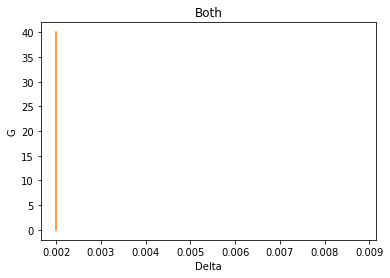

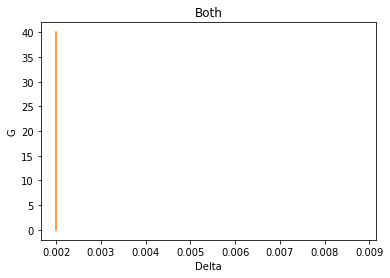

 11%|█         | 2/19 [00:00<00:01, 12.10it/s]

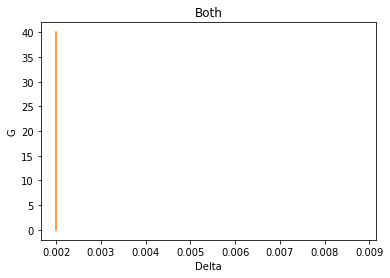

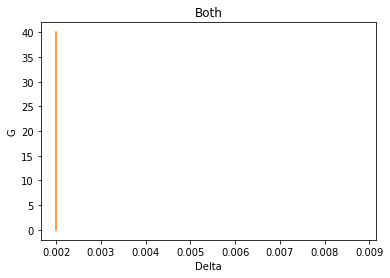

 21%|██        | 4/19 [00:00<00:01, 12.10it/s]

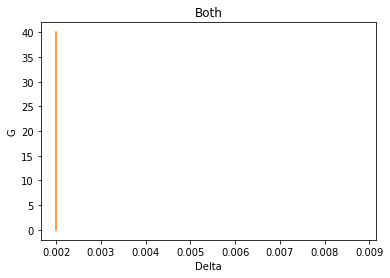

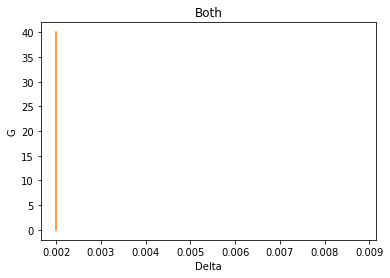

 32%|███▏      | 6/19 [00:00<00:01, 12.12it/s]

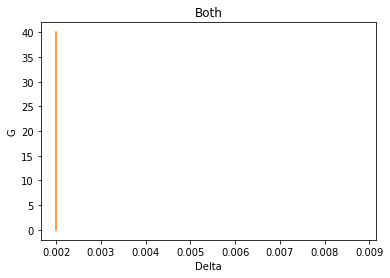

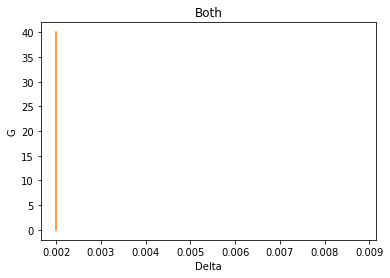

 42%|████▏     | 8/19 [00:01<00:02,  4.38it/s]

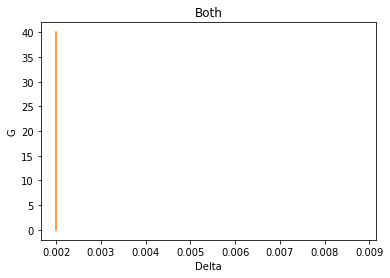

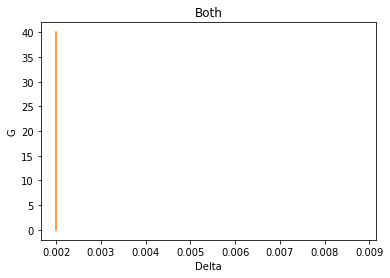

 53%|█████▎    | 10/19 [00:01<00:01,  5.42it/s]

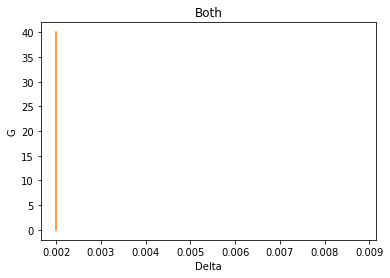

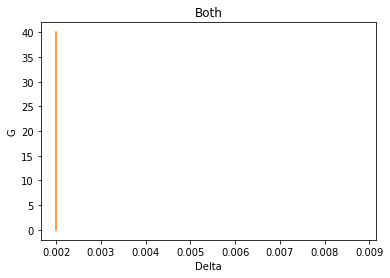

 63%|██████▎   | 12/19 [00:01<00:01,  6.50it/s]

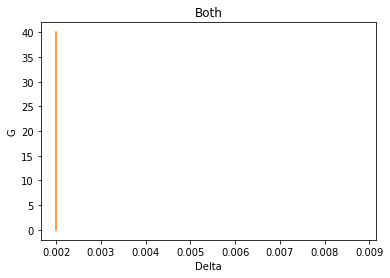

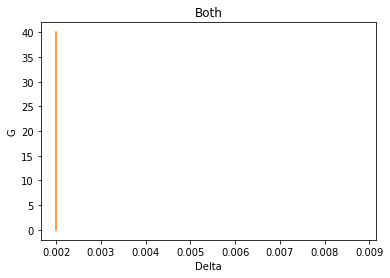

 74%|███████▎  | 14/19 [00:02<00:00,  7.58it/s]

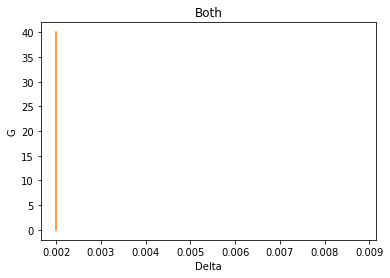

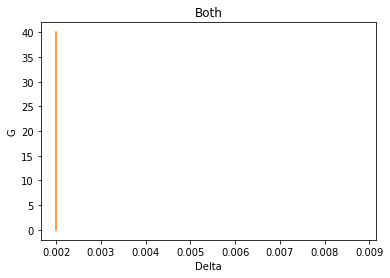

 84%|████████▍ | 16/19 [00:02<00:00,  8.57it/s]

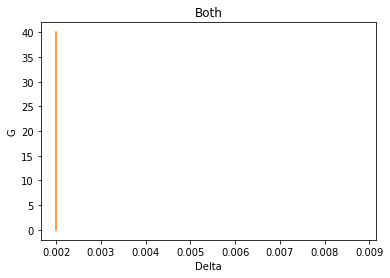

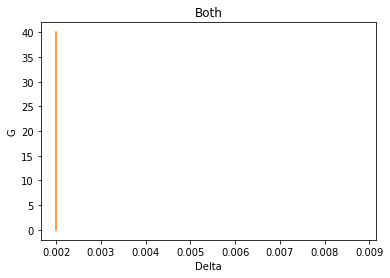

 95%|█████████▍| 18/19 [00:02<00:00,  9.44it/s]

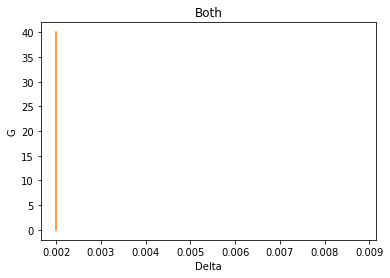

100%|██████████| 19/19 [00:03<00:00,  5.43it/s]


In [8]:
for to in tqdm(np.arange(0.001,0.020, 0.001)):
    something(t1=to,t2=t2,t3=t3)